# Reading data, making plots: Tide Gauges
_Lecture notes from Friday, Jun 18_

We are now ready to work with some data, and our example will be tide gauge data from the UH Sea Level Center (http://uhslc.soest.hawaii.edu).

As with most applications, we start with actually getting the data.  There are many different ways to do this, but in a broad sense we can either get data and store it on a local machine/directory or try access the data directly from a "data server", _e.g._, a remote web site.  This latter option is not always available, so it's good to learn both methods.  Also, it is sometimes useful to have the data on your local machine, for example, you can still work with it while not on the Internet.

## 1. Getting data onto local machine

The basic process is to visit some web site and download a data set. If you click on something in a browser, the browser will try open it with some known program.  It should also allow you to "save as".

In this example, go to http://uhslc.soest.hawaii.edu --> data --> legacy data. You should see a page like this:

<img src='tide1.png'>


There are three columns to get the data: "Data", "CSV" and "NetCDF".  You should either get one from the CSV or NetCDF columns.  If you "right-click" on the data of interest, _e.g._, Honolulu hourly under CSV, you should get a popup that asks to "save the data":

<img src='tide2.png'>
     
You now have the data on your local machine.  It's fine to use a local python/jupyter instance to work with the data, but if you want to use the class machine (sunrise) you'll have to move the file over.  This can be done with __scp__, recall the syntax is copy-file-from, space, copy-file-to.  For example, if you download the file h001.cvs into a directory called "Downloads", and you want it on your home directory for class, from your local computer you would open a terminal session and enter:

    scp Downloads/h001.csv name@sunrise.soest.hawaii.edu:/home/sunset0/htdocs/ges/ocn463-2021/name
    
where _name_ is your login name on the class machine (SOEST/UH login name, probably all the same).

Recall that you can check if the file is there by opening a terminal session on the jupyterhub, then using the linux ls command: 

    ls -l h001.csv
    
and you can view the file with

    more h001.csv

Now let's look at some examples reading the data.

## 2. Accessing the data with python
There are many different ways to access data within python, and here we'll go through just a few examples.  In a broad sense we will always follow the same process: read the data in, have a look at it to see if it makes sense, and print out the type and shape to see if they make sense.  It's the details that will vary from case to case.  

Note it is always useful to look at the data when downloaded to make sure it makes sense.  For example, if you read in a dataset and expect hundreds of rows, and instead see only one, something went wrong.

In [60]:
# First we import needed packages.  Note these three will pretty much be the
# defaults for this class (we'll always use them), and let's stick to the 
# convention of using numpy as np, pandas as pd, and matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
# 1.  First example: load using numpy "loadtxt"
#     the syntax is filename, delimiter, comments
#     in this case we have comma-separated, with
#     no comment/header lines, but it doesn't hurt
#     to keep this.

data = np.loadtxt('../h005.csv',delimiter=',',comments='#')

In [26]:
#     We now have a variable called "data" that should
#     have all the sea level data in it.  Let's print
#     the type, shape and look at the data just to make
#     sure.  NOTE: type is an internal function, so the
#     syntax is type(data), while shape is a method of
#     the object data, so it's syntax is data.shape()

print( 'Data are ', type(data), ' shape is ', data.shape )
print(data)

Data is  <class 'numpy.ndarray'>  shape is  (167321, 5)
[[2.001e+03 1.200e+01 1.600e+01 6.000e+00 1.333e+03]
 [2.001e+03 1.200e+01 1.600e+01 7.000e+00 1.130e+03]
 [2.001e+03 1.200e+01 1.600e+01 8.000e+00 8.670e+02]
 ...
 [2.021e+03 1.000e+00 1.600e+01 2.000e+01 1.089e+03]
 [2.021e+03 1.000e+00 1.600e+01 2.100e+01 1.049e+03]
 [2.021e+03 1.000e+00 1.600e+01 2.200e+01 9.170e+02]]


In [7]:
#     data are now loaded into a variable called "data"; 
#     note the object is a numpy array, and there are 
#     167,321 rows and five columns.  Here we either 
#     check the web site or just assume the columns are:
#     year, month, day, hour, sea level

#     Next, we assing the columns to individual variables.
#     NOTE: since our object "data" is a numpy array, we
#     use the synax of [row,column], with ":" meaning all
#     so "year = data[:,0]" means the variable "year" will
#     be set to "all rows", "first column" of "data":

year = data[:,0]
month = data[:,1]
day = data[:,2]
hour = data[:,3]
sea_level = data[:,4]

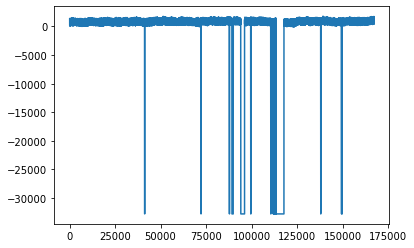

In [8]:
#     Finally, to check what we have, let's make a quick
#     plot of sea_level
plt.plot(sea_level)

In [27]:
# 2.  Second example: load using Pandas "read_table"
#     the syntax is filename, delimiter (in this case
#     sep for separater); again in this case we have 
#     comma-separated

data = pd.read_table('../h005.csv',sep=',')

In [28]:
#     Again, let's check what we have:

print( 'Data are ', type(data), ' shape is ', data.shape )
print(data)

Data is  <class 'pandas.core.frame.DataFrame'>  shape is  (167320, 5)
        2001  12  16   6  1333
0       2001  12  16   7  1130
1       2001  12  16   8   867
2       2001  12  16   9   553
3       2001  12  16  10   308
4       2001  12  16  11   177
...      ...  ..  ..  ..   ...
167315  2021   1  16  18  1083
167316  2021   1  16  19  1121
167317  2021   1  16  20  1089
167318  2021   1  16  21  1049
167319  2021   1  16  22   917

[167320 rows x 5 columns]


In [30]:
#     This time we get a "pandas dataframe"
#     We will see this is a much better format
#     with which to work.  More in the next 
#     example

In [32]:
# 3.  Third example: load using pandas read_csv.
#     This is very similar to read_table, but
#     presumes a comma separated data set

data = pd.read_csv('../h005.csv')
print( 'Data are ', type(data), ' shape is ', data.shape )
print(data)

Data is  <class 'pandas.core.frame.DataFrame'>  shape is  (167320, 5)
        2001  12  16   6  1333
0       2001  12  16   7  1130
1       2001  12  16   8   867
2       2001  12  16   9   553
3       2001  12  16  10   308
4       2001  12  16  11   177
...      ...  ..  ..  ..   ...
167315  2021   1  16  18  1083
167316  2021   1  16  19  1121
167317  2021   1  16  20  1089
167318  2021   1  16  21  1049
167319  2021   1  16  22   917

[167320 rows x 5 columns]


In [33]:
#     Again, we get a pandas data frame.  Let's just
#     look at a few features.  For example, we can
#     look at the top of it (data.head()) or bottom
#     (data.tail())
data.head()

,2001,12,16,6,1333
0,2001,12,16,7,1130
1,2001,12,16,8,867
2,2001,12,16,9,553
3,2001,12,16,10,308
4,2001,12,16,11,177


In [34]:
#     Notice we have a nicely formatted table, with
#     a row index (starting at zero) and column 
#     headings.  However, since this data set had
#     no headings, pandas uses the first row as the
#     headings.  This is actually read data, so we
#     want to put our own headings.  read_csv lets
#     us do that:

#     define a list that contains our desired headings
column_headings = ['year', 'month', 'day', 'hour', 'sea level']
#     now add that to the read_csv
data = pd.read_csv('../h005.csv',names=column_headings)
data.head()

,year,month,day,hour,sea level
0,2001,12,16,6,1333
1,2001,12,16,7,1130
2,2001,12,16,8,867
3,2001,12,16,9,553
4,2001,12,16,10,308


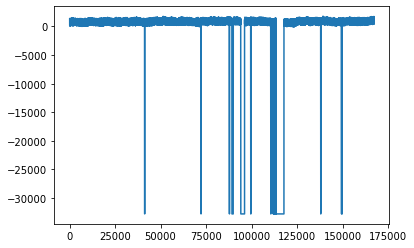

In [36]:
#     So now we have a nice looking table.  NOTE: since
#     this is a DataFrame, we access the rows/columns
#     differently than with the arrays (e.g., remember
#     before we had data[:,0]).  Now we simply address
#     the column by its heading.  So, to make a plot:

plt.plot(data['sea level']);

In [37]:
# 4.  Third example: load using netcdf.  We now will
#     use the netCDF4 package to read a netCDF file.
#     netCDF files are very common in ocean/atmo data,
#     and contain metadata within the file, so it's
#     a great format to use.  
#     NOTE: you'll have to repeat the above download
#     but this time get the netcdf file and not the CSV.

In [39]:
from netCDF4 import Dataset
fin = Dataset('../h005.nc')

In [40]:
#     We now have an object call "fin" that has the
#     data inside.  Since it's a netCDF we can do 
#     different queries.  For example,
#     show all the metadata
#fin.variables
#     show the variable names
fin.variables.keys()

odict_keys(['sea_level', 'time', 'lat', 'lon', 'station_name', 'station_country', 'station_country_code', 'record_id', 'uhslc_id', 'gloss_id', 'ssc_id', 'last_rq_date'])

In [50]:
#     The data can be extracted in a similar way
#     where we specify the input variable name.
#     For example, we can set the dataset variable
#     "lon" to a variable longitude:
time = fin['time'][:]
latitude = fin['lat']
longitude = fin['lon']
sea_level = fin['sea_level'][0]

<class 'numpy.ma.core.MaskedArray'> (242999,)


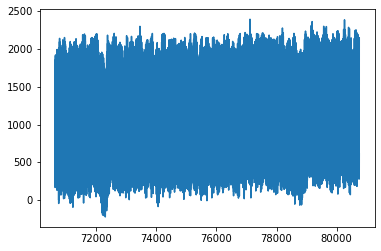

In [48]:
#     NOTE: in the above we added an extra constraint
#     on time [:] and on sea_level [0]; this will become
#     clear later, but essentially we are getting all
#     time and all sea level, but the file stores these
#     with different dimentions (check this with type)

#     Again, we make a quick plot.  This time we can use
#     time as the x-axis and sea_level as y.  Notice we
#     don't have problems with missing values!

plt.plot(time,sea_level)

### Repeat without downloading
It is important to note that both the CSV and netCDF files can be imported into your python script without having to download the data.  Insead you can just get the link to the data and use that (note the server has to be properly setup to do this, like the Sea Level Center does). To get the URL, _right click_ on the data of interest and then "copy link location",
and finally paste that url.

In [55]:
URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h005.csv'
column_headings = ['year', 'month', 'day', 'hour', 'sea level']
data = pd.read_csv(URL,names=column_headings)

## Working with the data
At this point we have read in the data and setup some variables.  There are a couple things we'd like to do:

1. Convert the time variable to something more sensible, and
2. Remove the missing data which appears as some big negative number

Fortunately numpy and pandas will provide the solution.  First, we can use pandas to_datetime to "fix" the dates.

In [57]:
# We have an index in the DataFrame that indicates each row (reminder this starts
#   at zero).  Since we have one hour per row, the index amounts to "hours since", 
#   and the first time value is May 14, 1993.  Thus, row one is "zero hours since
#   05/14/93", second row it "1 hour since 05/14/93" and so on.

data.head()

,year,month,day,hour,sea level
0,1993,5,14,1,1092
1,1993,5,14,2,939
2,1993,5,14,3,804
3,1993,5,14,4,710
4,1993,5,14,5,697


In [58]:
# there is a function in pandas to make dates easily; pd.to_datetime()
# it takes a "date", an "origin", and a format so if we specify the
# index and "hours since may-14-1993", each row will have the proper
# time (note this is just one way to do it).

#  a) to get columns, e.g., "hour", we use square brackets: data['hour']
#     but now we want the row, or index; to get this use data.index
#  b) datetime will read seconds, so we convert from hours to seconds
#     (*3600)
#  c) finally, we specify the start date as the origin

date = pd.to_datetime(data.index*3600.0, origin = '05-14-1993', unit='s')

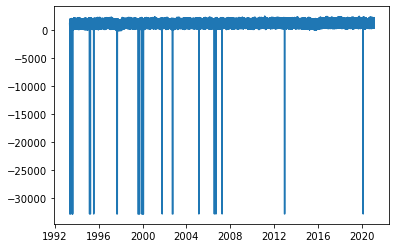

In [59]:
# Now we can plot with a more "sensible" time
plt.plot(date,data['sea level'])

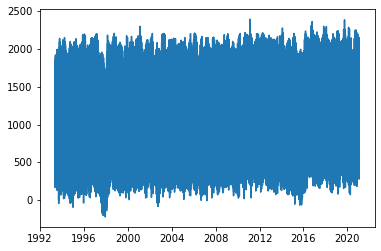

In [61]:
# Now how to do this with netCDF data?  Here we can use
#  the same funtion, and it's a litte easier.  The netCDF
#  variable "time" is defined as "days since 1800-01-01"
#  so we just use that:

date = pd.to_datetime(time,origin='1800-01-01 00:00:00',unit='d')
plt.plot(date,sea_level)

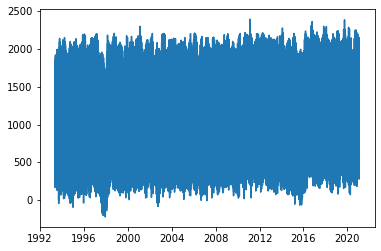

In [71]:
# The final step is to remove the missing data.  It
#   appears in the CSV data set that missing values
#   are set to some large, negative number.  We can
#   again, take advantage of the DataFrame to replace
#   these.  The basic idea is to 1) find the location
#   where sea level is less than, say -1000, and set
#   to missing.  In numpy, like many other programs,
#   we can use "not a number", or NaN (nan).

URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h005.csv'
column_headings = ['year', 'month', 'day', 'hour', 'sea level']
data = pd.read_csv(URL,names=column_headings)
date = pd.to_datetime(data.index*3600.0, origin = '05-14-1993', unit='s')

# a couple ways to do this: use "numpy where" to find
# where the values are less than -1000 and replace with
# NaN; use "replace" to replace values where less than
# -1000; finally, find the location ("loc") where the
# DataFrame is less than zero and make it NaN

#np.where(data['sea level'] < -1000, np.nan)
#data.replace(data['sea level'] < -1000,np.nan)
#data.loc[data['sea level'] < -1000,'sea level'] = np.nan

ssh = data['sea level']
ssh[ssh < -1000] = np.nan

plt.plot(date,data['sea level'])

## 3. Do some analyis
A quick thing we can do is try plot the data between a certain range.  Let's pull data for Honolulu and Midway, then make a plot over mid May 1960 to see if we can observe the tsunami generated by the Chile earthquake.

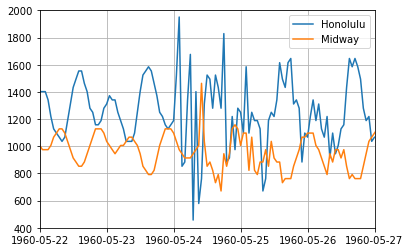

In [77]:
import datetime as dt
# read data from URL; specify URL here
HI_URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv'
MW_URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h050.csv'

# define column headings
column_headings = ['year', 'month', 'day', 'hour', 'sea level']

# read data into DataFrame called "data"
HI_data = pd.read_csv(HI_URL,names=column_headings)
MW_data = pd.read_csv(MW_URL,names=column_headings)

# convert time into a reasonal date format
HI_date = pd.to_datetime(HI_data.index*3600.0, origin = '01-02-1905', unit='s')
MW_date = pd.to_datetime(MW_data.index*3600.0, origin = '02-09-1947', unit='s')

# plot
plt.plot(HI_date,HI_data['sea level'],label='Honolulu')
plt.plot(MW_date,MW_data['sea level'],label='Midway')
plt.xlim([dt.datetime(1960,5,22),dt.datetime(1960,5,27)])
plt.ylim(400,2000)
plt.grid()
plt.legend()

In [78]:
# fit a linear trend to the data
# 
# here we take advantage of the functions in numpy called
# "polyfit" that will fit a polynomial to data. This uses
# least-squares to get the best fit, and you can specify
# the order as well (1: linear, 2: square, 3: cubic, etc.)
#
# One important note: polyfit can't deal with missing 
# values, so we need to somehow fill these.  We will do
# this by filling with the mean.  In otherwords, if a
# value is missing, we fill it with the mean value.  This
# is not scientifically advisable, but we use it here as
# an example.



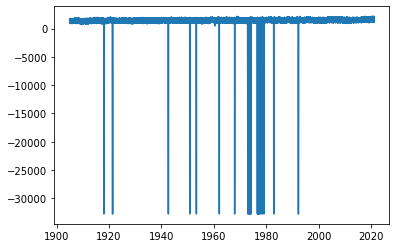

In [103]:
# read data from URL; specify URL here
HI_URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv'

# define column headings
column_headings = ['year', 'month', 'day', 'hour', 'sea level']

# read data into DataFrame called "data"
HI_data = pd.read_csv(HI_URL,names=column_headings)

# convert time into a reasonal date format
HI_date = pd.to_datetime(HI_data.index*3600.0, origin = '01-02-1905', unit='s')

plt.plot(HI_date,HI_data['sea level'])

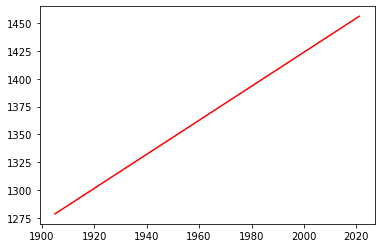

In [114]:
# replace missing values with mean
# find values equal to -32767 and replace with nan
HI_data2 = HI_data.replace(-32767,np.nan)

# replace these nan values with the mean
HI_data3 = HI_data2.fillna(np.nanmean(HI_data2))

# compute the linear trend
B = np.polyfit(HI_data3.index.values,HI_data3['sea level'],1)
ssh_trend = np.polyval(B,HI_data.index.values)

plt.plot(HI_date,ssh_trend,'r-')

Text(1910-01-01, 2100, '1.5280054231882332')

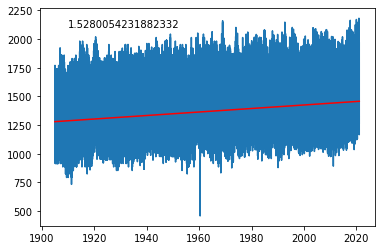

In [115]:
# show the trend as text on the graph
# the syntax here is: 1) slope is the first
# value of B, i.e., B[0]; 2) this is in
# milimeters per hour, so we change this to
# centimeters per decade; 3) we use the
# matplotlib function "text" and place the
# string at x=1910, y = 2100
trend = str(B[0] * 24.0 * 365.0 * 10.0 / 10.0)
plt.plot(HI_date,HI_data2['sea level'])
plt.plot(HI_date,ssh_trend,'r-')
plt.text(dt.date(1910,1,1,),2100,trend)

## Summary

Text(0, 0.5, 'Sea Level (mm)')

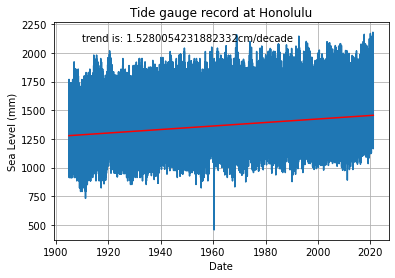

In [116]:
# read data from URL; specify URL here
HI_URL = 'http://uhslc.soest.hawaii.edu/data/csv/fast/hourly/h057.csv'

# define column headings
column_headings = ['year', 'month', 'day', 'hour', 'sea level']

# read data into DataFrame called "data"
HI_data = pd.read_csv(HI_URL,names=column_headings)

# convert time into a reasonal date format
HI_date = pd.to_datetime(HI_data.index*3600.0, origin = '01-02-1905', unit='s')

# find values equal to -32767 and replace with nan
HI_data2 = HI_data.replace(-32767,np.nan)

# replace these nan values with the mean
HI_data3 = HI_data2.fillna(np.nanmean(HI_data2))

# compute the linear trend
B = np.polyfit(HI_data3.index.values,HI_data3['sea level'],1)
ssh_trend = np.polyval(B,HI_data.index.values)
trend = str(B[0] * 24.0 * 365.0 * 10.0 / 10.0)

# plot
plt.plot(HI_date,HI_data2['sea level'])
plt.plot(HI_date,ssh_trend,'r-')
plt.text(dt.date(1910,1,1,),2100,'trend is: ' + trend + 'cm/decade')
plt.grid()
plt.title('Tide gauge record at Honolulu')
plt.xlabel('Date')
plt.ylabel('Sea Level (mm)')

Now repeat the same thing, but use netCDF data

odict_keys(['sea_level', 'time', 'lat', 'lon', 'station_name', 'station_country', 'station_country_code', 'record_id', 'uhslc_id', 'gloss_id', 'ssc_id', 'last_rq_date'])


/opt/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  from ipykernel import kernelapp as app
/opt/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  app.launch_new_instance()


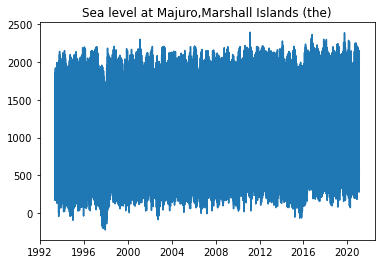

In [117]:
# import netCDF4 package, only "Dataset" and "chartostring"
from netCDF4 import Dataset, chartostring

import matplotlib.pyplot as plt
import pandas as pd
fin = Dataset('../h005.nc')
print(fin.variables.keys())
latitude = fin['lat']
longitude = fin['lon']
time = fin['time'][:]
h = fin['sea_level'][0]
date = pd.to_datetime(time,origin='1800-01-01 00:00:00',unit='d')
plt.plot(date,h)
#print(fin.variables)
name = chartostring(fin['station_name'][0])
place = chartostring(fin['station_country'][0])
plt.title('Sea level at ' + str(name) + ',' + str(place));